In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from requests import get
from bs4 import BeautifulSoup
import re
import json

In [9]:
def get_coinlist():
    url = 'https://min-api.cryptocompare.com/data/all/coinlist'
    page = get(url).text
    x = re.findall("\{\"Id\".*?\}",page)
    table = {"CoinName":[],"Symbol":[],"IsTrading":[]}
    for i in range(len(x)):
        cache = json.loads(x[i])
        for key in table:
            table[key].append(cache[key])
    table=pd.DataFrame(table)
    return table

In [75]:
coinlist=get_coinlist()
coinlist.head()

,CoinName,IsTrading,Symbol
0,42 Coin,True,42
1,300 token,True,300
2,365Coin,True,365
3,404Coin,True,404
4,SixEleven,True,611


In [16]:
coinlist.to_pickle("coinlist.pkl")

In [118]:
import datetime
import time

def daily_price_historical(end_time,symbol, comparison_symbol="USD",limit=2000, aggregate=1, allData='true'):
    timestamp = time.mktime(datetime.datetime.strptime(end_time, "%Y-%m-%d").timetuple())
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&allData={}&toTs={}'.format(symbol.upper(),comparison_symbol.upper(), limit, aggregate, allData, timestamp)
    page = get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['time'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    df = df.loc[:,["open","high","low","close","time"]]
    df.time = df.time.dt.strftime('%Y-%m-%d')
    df.set_index("time",inplace=True)
    return df

In [67]:
a = daily_price_historical("2018-05-01",df.Symbol[0])

In [68]:
a.tail()

,close,high,low,open
time,,,,
2018-04-21,32646.43,32646.43,31764.10,32646.43
2018-04-22,32285.70,33182.53,32285.70,33182.53
2018-04-23,34760.77,35436.68,34760.77,34760.77
2018-04-24,31945.03,32566.19,31945.03,31945.03
2018-04-25,31682.59,31847.00,31682.59,31847.00


In [74]:
database={}


In [122]:
end_time = "2018-05-01"
n=len(coinlist)

for i in range(len(coinlist)):
    if (i+1)%1000==0:
        time.sleep(10*60)
        print("wait for 10 min...")
    if coinlist.iloc[i,1]:
        print("downloading {}'s data ({}/{})".format(coinlist.iloc[i,2],i+1,n))
        try:
            database[coinlist.iloc[i,2]]=daily_price_historical(end_time,coinlist.iloc[i,2])
        except AttributeError as e:
            print("No data for {}".format(coinlist.iloc[i,2]))
            print("continue downloading... \n")
        finally:
            time.sleep(1.5)        

downloading 42's data (1/2463)
downloading 300's data (2/2463)
downloading 365's data (3/2463)
downloading 404's data (4/2463)
downloading 611's data (5/2463)
downloading 808's data (6/2463)
downloading 888's data (7/2463)
downloading 1337's data (8/2463)
downloading 2015's data (9/2463)
downloading XMR's data (10/2463)
downloading NXT's data (11/2463)
downloading DOGE's data (12/2463)
downloading ZEC's data (13/2463)
downloading BTS's data (14/2463)
downloading DGB's data (15/2463)
downloading BTCD's data (16/2463)
downloading PPC's data (17/2463)
downloading CRAIG's data (18/2463)
downloading XBS's data (19/2463)
downloading XPY's data (20/2463)
downloading PRC's data (21/2463)
downloading YBC's data (22/2463)
downloading DANK's data (23/2463)
downloading GIVE's data (24/2463)
downloading KOBO's data (25/2463)
downloading DT's data (26/2463)
downloading CETI's data (27/2463)
downloading SUP's data (28/2463)
downloading XPD's data (29/2463)
downloading GEO's data (30/2463)
downloading

downloading XCP's data (246/2463)
downloading MAID's data (247/2463)
downloading 007's data (248/2463)
downloading NSR's data (249/2463)
downloading MONA's data (250/2463)
downloading CELL's data (251/2463)
downloading TEK's data (252/2463)
downloading TRON's data (253/2463)
downloading BAY's data (254/2463)
downloading NTRN's data (255/2463)
downloading SLING's data (256/2463)
downloading XVC's data (257/2463)
downloading CRAVE's data (258/2463)
downloading BLOCK's data (259/2463)
downloading XSI's data (260/2463)
downloading BYC's data (261/2463)
downloading GRC's data (262/2463)
downloading GEMZ's data (263/2463)
downloading KTK's data (264/2463)
downloading HZ's data (265/2463)
downloading FAIR's data (266/2463)
downloading QORA's data (267/2463)
downloading RBY's data (268/2463)
downloading KORE's data (269/2463)
downloading WBB's data (270/2463)
downloading SSD's data (271/2463)
downloading XTC's data (272/2463)
downloading NOTE's data (273/2463)
downloading FLO's data (275/2463)

downloading TRUMP's data (488/2463)
downloading PRM's data (489/2463)
downloading BCY's data (490/2463)
downloading RBIES's data (491/2463)
downloading STEEM's data (492/2463)
downloading BLRY's data (493/2463)
downloading XWC's data (494/2463)
downloading DOT's data (495/2463)
downloading SCOT's data (496/2463)
downloading DNET's data (497/2463)
downloading BAC's data (498/2463)
downloading XID*'s data (499/2463)
downloading GRT's data (500/2463)
downloading TCR's data (501/2463)
downloading POST's data (502/2463)
downloading INFX's data (503/2463)
downloading ETHS's data (504/2463)
downloading PXL's data (505/2463)
downloading NUM's data (506/2463)
downloading SOUL's data (507/2463)
downloading ION's data (508/2463)
downloading GROW's data (509/2463)
downloading UNITY's data (510/2463)
downloading OLDSF's data (511/2463)
downloading SSTC's data (512/2463)
downloading NETC's data (513/2463)
downloading GPU's data (514/2463)
downloading TAGR's data (515/2463)
downloading HMP's data (51

downloading BRONZ's data (733/2463)
downloading SH's data (734/2463)
downloading MG's data (735/2463)
downloading PSI's data (736/2463)
downloading XPO's data (737/2463)
downloading NLC's data (738/2463)
downloading PSB's data (739/2463)
downloading XBTS's data (740/2463)
downloading FIT's data (741/2463)
downloading PINKX's data (742/2463)
downloading FIRE's data (743/2463)
downloading UNF's data (744/2463)
downloading SPORT's data (745/2463)
downloading PPY's data (746/2463)
downloading NTC's data (747/2463)
downloading EGO's data (748/2463)
downloading RCN*'s data (750/2463)
downloading X2's data (751/2463)
downloading MT's data (752/2463)
downloading TIA's data (753/2463)
downloading GBRC's data (754/2463)
downloading XUP's data (755/2463)
downloading HALLO's data (756/2463)
downloading BBCC's data (757/2463)
downloading BHC's data (759/2463)
downloading CRAFT's data (760/2463)
downloading INV's data (761/2463)
downloading OLYMP's data (762/2463)
downloading DPAY's data (763/2463)


downloading CNO's data (980/2463)
downloading WEALTH's data (981/2463)
downloading XSPEC's data (982/2463)
downloading PEPECASH's data (983/2463)
downloading CLICK's data (984/2463)
downloading ELS's data (985/2463)
downloading KUSH's data (986/2463)
downloading ERY's data (987/2463)
downloading PRES's data (988/2463)
downloading BTZ's data (989/2463)
downloading OPES's data (990/2463)
downloading WCT's data (991/2463)
downloading UBQ's data (992/2463)
downloading RATIO's data (993/2463)
downloading BAN's data (994/2463)
downloading NICE's data (995/2463)
downloading SMF's data (996/2463)
downloading CWXT's data (997/2463)
downloading TECH's data (998/2463)
downloading CIR's data (999/2463)
wait for 10 min...
downloading LEPEN's data (1000/2463)
downloading ROUND's data (1001/2463)
downloading MAR's data (1002/2463)
downloading MARX's data (1003/2463)
downloading HAZE's data (1005/2463)
downloading PRX's data (1006/2463)
downloading NRC's data (1007/2463)
downloading IMPCH's data (1008

downloading STAR's data (1218/2463)
downloading COR's data (1219/2463)
downloading XRL's data (1220/2463)
downloading OAX's data (1222/2463)
downloading MBI's data (1223/2463)
downloading DDF's data (1224/2463)
downloading DIM's data (1225/2463)
downloading DNA's data (1226/2463)
downloading FYN's data (1227/2463)
downloading DCY's data (1228/2463)
downloading CFT's data (1229/2463)
downloading DNR's data (1230/2463)
downloading DP's data (1231/2463)
downloading VUC's data (1232/2463)
downloading BTPL's data (1233/2463)
downloading UNIFY's data (1234/2463)
downloading IPC's data (1235/2463)
downloading BRIT's data (1236/2463)
downloading SOCC's data (1238/2463)
downloading LA's data (1240/2463)
downloading IML's data (1241/2463)
downloading STU's data (1242/2463)
downloading PLR's data (1243/2463)
downloading GUNS's data (1244/2463)
downloading IFT's data (1245/2463)
downloading CAT*'s data (1246/2463)
downloading PRO's data (1247/2463)
downloading IND's data (1249/2463)
downloading ZR

downloading REQ's data (1509/2463)
downloading ARN's data (1510/2463)
downloading DAT's data (1511/2463)
downloading VIBE's data (1512/2463)
downloading DAY's data (1515/2463)
downloading AST's data (1516/2463)
downloading FLP's data (1517/2463)
downloading CND's data (1519/2463)
downloading VRP*'s data (1520/2463)
downloading NTM's data (1521/2463)
downloading TZC's data (1522/2463)
downloading ENG's data (1523/2463)
downloading MCI's data (1524/2463)
downloading COV's data (1525/2463)
downloading WAX's data (1526/2463)
downloading AIR's data (1527/2463)
downloading NTO's data (1528/2463)
downloading ATCC's data (1529/2463)
downloading KOLION's data (1530/2463)
downloading WILD's data (1531/2463)
downloading ELTC2's data (1532/2463)
downloading POWR's data (1534/2463)
downloading C20's data (1535/2463)
downloading RYZ's data (1536/2463)
downloading GXC*'s data (1537/2463)
downloading ELM's data (1538/2463)
downloading TER's data (1539/2463)
downloading BQ's data (1541/2463)
downloadin

downloading GET's data (1796/2463)
downloading ERC20's data (1797/2463)
downloading ITC's data (1798/2463)
downloading HTML's data (1799/2463)
downloading NMS's data (1800/2463)
downloading PHO's data (1801/2463)
downloading NTWK's data (1803/2463)
downloading SUCR's data (1804/2463)
downloading SMART*'s data (1805/2463)
downloading GNX's data (1806/2463)
downloading NAS's data (1807/2463)
downloading BTH's data (1809/2463)
downloading TOK's data (1810/2463)
downloading EREAL's data (1811/2463)
downloading CPN's data (1812/2463)
downloading XFT's data (1813/2463)
downloading QLC's data (1814/2463)
downloading BTSE's data (1815/2463)
downloading Q2C's data (1817/2463)
downloading BLT's data (1818/2463)
downloading SPF's data (1819/2463)
downloading TDS's data (1820/2463)
downloading ORE's data (1821/2463)
downloading SPK's data (1822/2463)
downloading GUN's data (1825/2463)
downloading DFS's data (1826/2463)
downloading POLIS's data (1827/2463)
downloading CL's data (1829/2463)
download

downloading RKT's data (2096/2463)
downloading GNT's data (2098/2463)
downloading DIG's data (2100/2463)
downloading BTC's data (2101/2463)
downloading VLX's data (2103/2463)
downloading ONT's data (2104/2463)
downloading CSC's data (2105/2463)
downloading XNK's data (2106/2463)
downloading FUCK's data (2107/2463)
downloading PFR's data (2109/2463)
downloading VIB's data (2111/2463)
downloading GGS's data (2112/2463)
downloading CLO's data (2113/2463)
downloading BEZ's data (2114/2463)
downloading ENTRC's data (2115/2463)
downloading PTC's data (2117/2463)
downloading XUC's data (2119/2463)
downloading ABT's data (2120/2463)
downloading ABT*'s data (2121/2463)
downloading REM's data (2122/2463)
downloading CDT's data (2125/2463)
downloading EXMR's data (2126/2463)
downloading UETL's data (2127/2463)
downloading XRP's data (2129/2463)
downloading LTC's data (2130/2463)
downloading VPRC's data (2131/2463)
downloading SC's data (2132/2463)
downloading IOP's data (2139/2463)
downloading PR

In [123]:
import pickle
with open("hist_daily_ohlc.pkl","wb") as f:
    pickle.dump(database,f)

In [143]:
def plot_hist(ticker):
    n=len(database[ticker].close)
    m=n//10
    plt.plot(database[ticker].close.values)
    plt.xticks(np.arange(0,n,m),database[ticker].index[range(0,n,m)],rotation=45)
    plt.show()

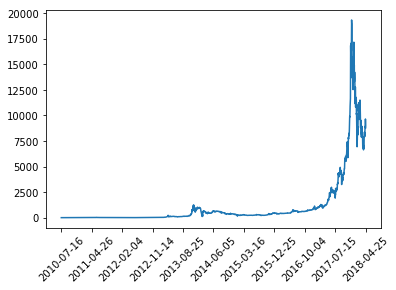

In [150]:
plot_hist("BTC")

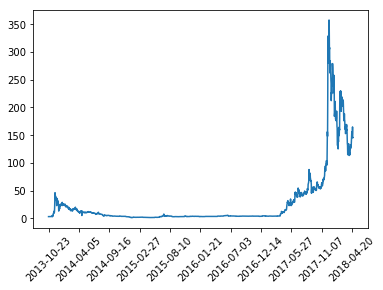

In [151]:
plot_hist("LTC")

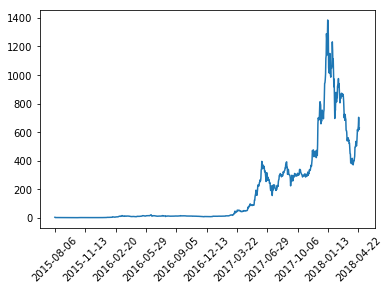

In [155]:
plot_hist("ETH")

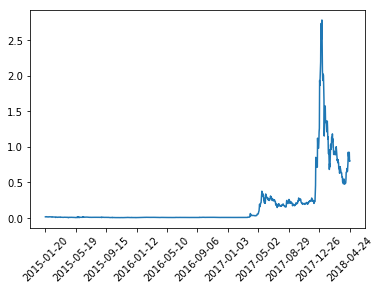

In [157]:
plot_hist("XRP")

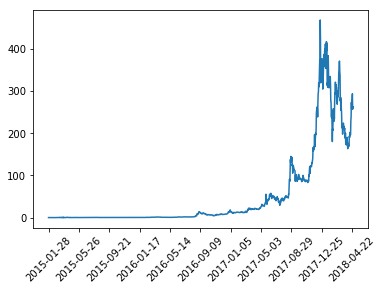

In [158]:
plot_hist("XMR")

In [148]:
database.keys()

dict_keys(['42', '300', '365', '404', '611', '808', '888', '1337', '2015', 'XMR', 'NXT', 'DOGE', 'ZEC', 'BTS', 'DGB', 'BTCD', 'PPC', 'CRAIG', 'XBS', 'XPY', 'PRC', 'YBC', 'DANK', 'GIVE', 'KOBO', 'DT', 'CETI', 'SUP', 'XPD', 'GEO', 'CHASH', 'SPR', 'NXTI', 'WOLF', 'XDP', 'AC', 'ACOIN', 'AERO', 'ALF', 'AGS', 'AMC', 'ALN', 'APEX', 'ARCH', 'ARG', 'ARI', 'AUR', 'AXR', 'BCX', 'BEN', 'BET', 'BITB', 'BLU', 'BLK', 'BOST', 'BQC', 'XMY', 'MOON', 'ZET', 'QTL', 'ENRG', 'QRK', 'RIC', 'DGC', 'LIMX', 'BTB', 'CAIX', 'BTE', 'BTG*', 'BTM', 'BUK', 'CACH', 'CANN', 'CAP', 'CASH', 'CAT1', 'CCN', 'CIN', 'CINNI', 'CXC', 'CLAM', 'CLOAK', 'CLR', 'CMC', 'CNC', 'CNL', 'COMM', 'COOL', 'CRACK', 'CRYPT', 'DEM', 'DMD', 'DRKC', 'DSB', 'DVC', 'EFL', 'ELC', 'EMC2', 'EMD', 'EXCL', 'EXE', 'EZC', 'FLAP', 'FC2', 'FFC', 'FIBRE', 'FRC', 'FLT', 'FRK', 'FRAC', 'FST', 'FTC', 'GDC', 'GLC', 'GLD', 'GLX', 'GLYPH', 'GML', 'GUE', 'HAL', 'HBN', 'HUC', 'HVC', 'HYP', 'ICB', 'IFC', 'IOC', 'IXC', 'JBS', 'JKC', 'JUDGE', 'KDC', 'KEY*', 'KGC', '